# 분류 분석

- 데이터가 어느 그룹에 속하는지 예측
- 군집 분석과 유사하지만, 분류 분석은 각 그룹이 사전에 정의되어 있음
- 문제와 해답을 모두 가지고 학습하는 지도 학습
- 예: 이탈 고객 예측, 스팸 메일 분류, 이미지 분류

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 데이터 전처리

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# 결측값 제거
penguins = penguins.dropna().reset_index(drop = True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


- 수치형 데이터: bill_length_mm,	bill_depth_mm,	flipper_length_mm,	body_mass_g
- 범주형 데이터: species, island, sex

## 정규화(normalization)

- 수치형 변수들의 단위를 맞추기 위해 데이터 정규화 진행
- minmaxscaler를 사용해 0 ~ 1 사이 값으로 정규화

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
features_normed = scaler.fit_transform(features)

penguins = penguins.assign(bill_length_mm = features_normed[:, 0],
                          bill_depth_mm = features_normed[:, 1],
                          flipper_length_mm = features_normed[:, 2],
                          body_mass_g = features_normed[:, 3])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


## label encoding

- 범주형 변수 수치화

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

features = penguins[['species', 'island', 'sex']]
encoded = features.apply(encoder.fit_transform)

penguins = penguins.assign(species = encoded['species'],
                          island = encoded['island'],
                          sex = encoded['sex'])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
3,0,2,0.167273,0.738095,0.355932,0.208333,0
4,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0
329,2,0,0.534545,0.142857,0.728814,0.597222,0
330,2,0,0.665455,0.309524,0.847458,0.847222,1
331,2,0,0.476364,0.202381,0.677966,0.694444,0


## 학습/테스트 세트 분리

In [7]:
from sklearn.model_selection import train_test_split

X = penguins.drop('sex', axis = 1)
y = penguins['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [8]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
14,0,2,0.505455,1.000000,0.372881,0.416667
157,1,1,0.712727,0.857143,0.372881,0.298611
137,0,1,0.312727,0.464286,0.305085,0.284722
263,2,0,0.527273,0.130952,0.644068,0.597222
316,2,0,0.534545,0.357143,0.728814,0.777778
...,...,...,...,...,...,...
203,1,1,0.625455,0.809524,0.525424,0.375000
87,0,1,0.272727,0.595238,0.237288,0.486111
161,1,1,0.669091,0.773810,0.491525,0.375000
311,2,0,0.690909,0.404762,0.898305,0.708333


# logistic regression

- 대표적인 이진 분류 머신러닝 알고리즘
- 회귀 방법론 + 시그모이드 함수를 사용해서 데이터가 어떤 범주에 속할 확률을 0 ~ 1 사이의 값으로 예측
- 예를 들어, 스팸일 확률이 0.5 이상이면 스팸으로 분류하고, 0.5보다 작으면 정상 메일로 분류

In [9]:
# 모델 정의

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(verbose = 2)

In [10]:
# 파라미터 종류

lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [11]:
# 모델 학습

lr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [12]:
# 예측
# male = 1, female = 0

predictions = lr_model.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0])

In [13]:
# 성능 평가

from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_test, predictions)
print('Logistic Regression 모델의 예측 정확도는 {}% 입니다.'.format(round(lr_acc * 100)))

Logistic Regression 모델의 예측 정확도는 94% 입니다.


In [14]:
lr_acc

0.9402985074626866

# KNeighborsClassifier

- 입력 데이터가 주어졌을 때, 입력값과 가까운 K개의 데이터가 속해 있는 범주로 예측해주는 알고리즘
- 데이터 간 거리 측정 시 '유클리디안 거리' 사용
- 이미지 처리, 영상/얼굴 인식, 상품 추천, 의료, 유전자 패턴 인식 등에서 사용

In [15]:
# 모델 정의

from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier()

In [16]:
# 파라미터 종류

knc_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
# 모델 학습

knc_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
# 예측
# male = 1, female = 0

predictions = knc_model.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0])

In [19]:
# 성능 평가

from sklearn.metrics import accuracy_score
knc_acc = accuracy_score(y_test, predictions)
print('KNeighborsClassifier 모델의 예측 정확도는 {}% 입니다.'.format(round(knc_acc * 100)))

KNeighborsClassifier 모델의 예측 정확도는 94% 입니다.


# decision tree

- 의사결정나무: 의사 결정 규칙을 나무 구조로 나타내어서 전체 데이터를 분류하거나, 수치형 자료를 예측하는데 모두 사용할 수 있는 알고리즘
- 의사결정나무 알고리즘은 가지 분할(split), 가지치기(pruning) 방법을 사용해서 복잡한 모형에서 단순화시키는 과정을 거침
- 나무 모형의 크기에 따라 머신러닝 성능이 달라지므로 적절한 크기로 설정해야 함

In [20]:
# 모델 정의

from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [21]:
# 파라미터 종류

dtc_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [22]:
# 모델 학습

dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

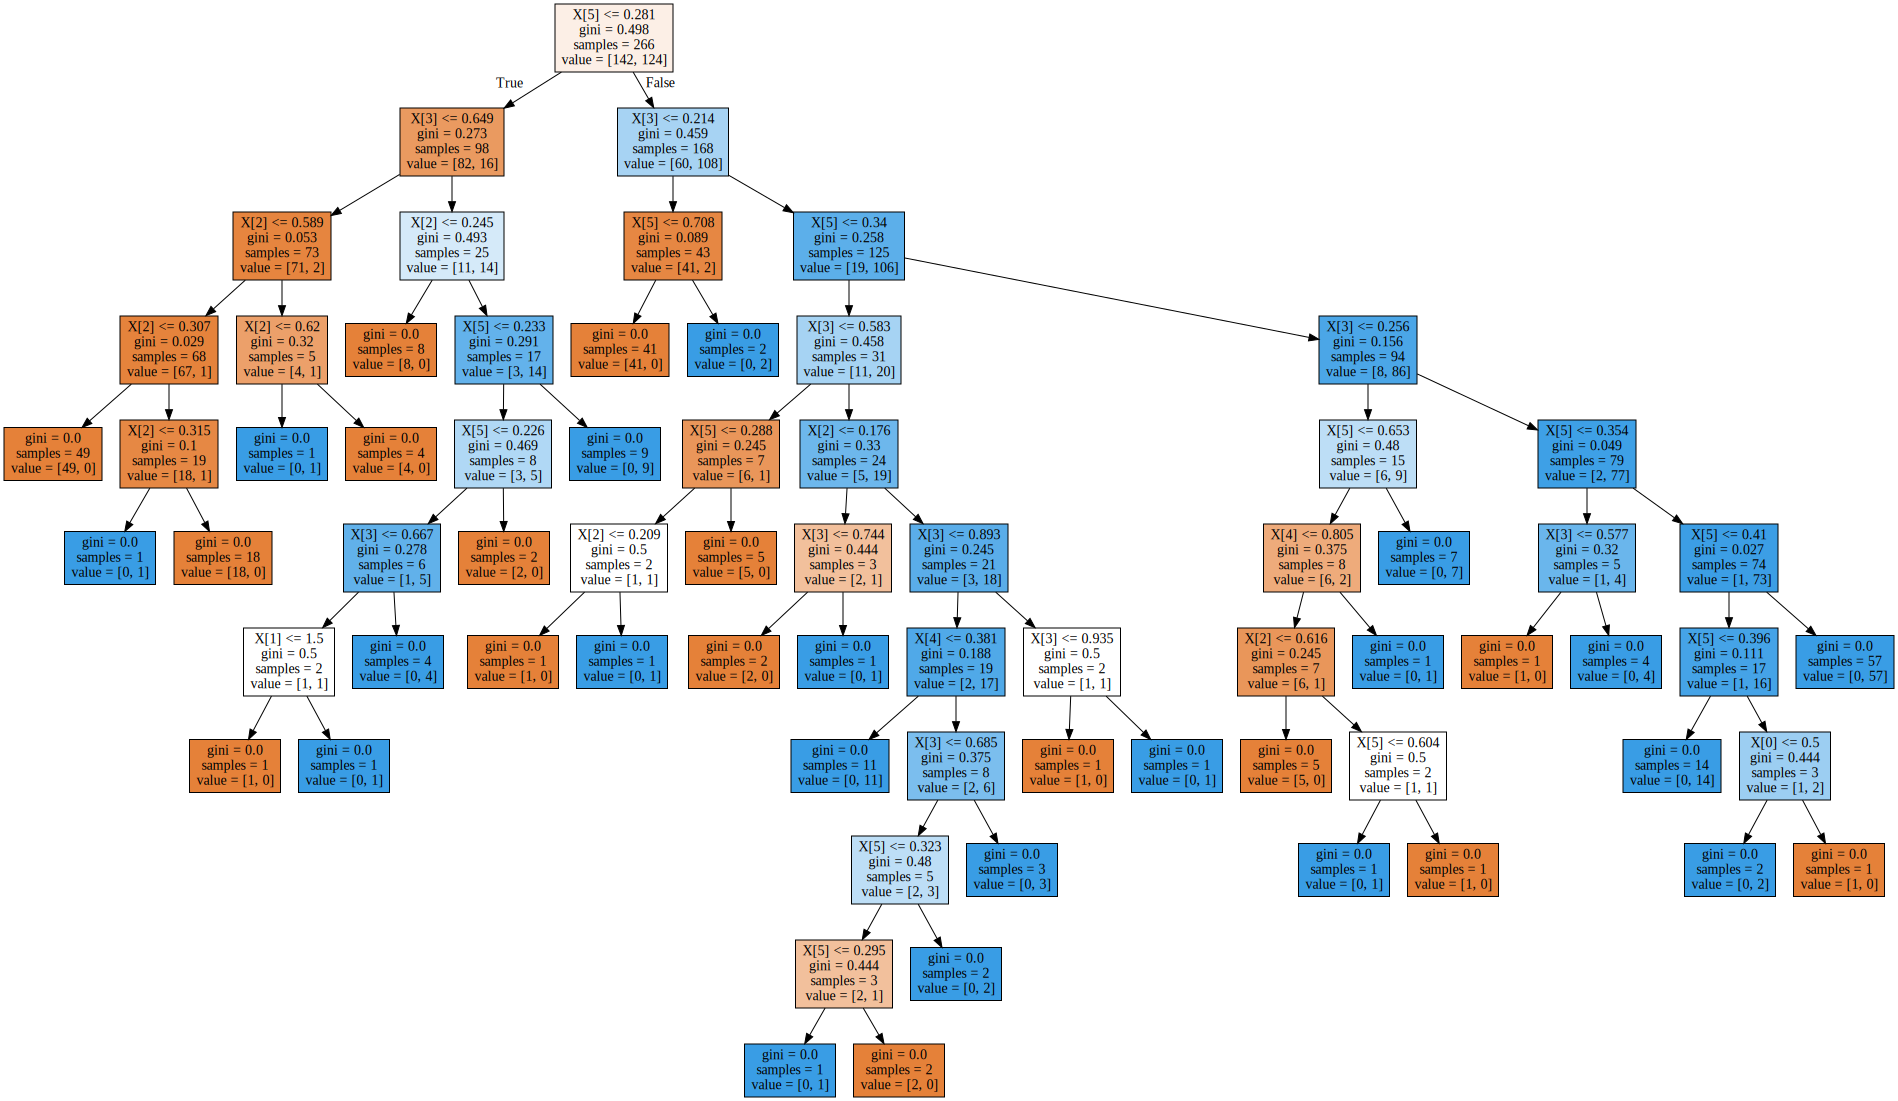

In [23]:
# 나무 시각화

from sklearn.tree import export_graphviz
import graphviz                              ################# graphviz 설치 필요

dot_data = export_graphviz(dtc_model, filled = True)
graphviz.Source(dot_data)

In [24]:
# 예측
# male = 1, female = 0

predictions = dtc_model.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0])

In [25]:
# 성능 평가

from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(y_test, predictions)
print('Decision Tree 모델의 예측 정확도는 {}% 입니다.'.format(round(dtc_acc * 100)))

Decision Tree 모델의 예측 정확도는 88% 입니다.


# 서포트 벡터 분류(SVC)

- support vector classifier: 두 데이터 그룹으로부터 최대한 멀리 떨어져 있는 초평면을 구하고, 이것을 사용하는 이진 분류 모델
- 서포트 벡터는 이 초평면을 결정하기 위해 사용되는 데이터 집합
- 분류나 예측 문제에 모두 사용 가능
- 데이터가 많을 때, 예측의 정확도가 비교적 높은 편

In [26]:
# 모델 정의

from sklearn.svm import SVC
svc_model = SVC()

In [27]:
# 파라미터 종류

svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
# 모델 학습

svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
# 예측
# male = 1, female = 0

predictions = svc_model.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0])

In [30]:
# 성능 평가

from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(y_test, predictions)
print('Support Vector Classifier 모델의 예측 정확도는 {}% 입니다.'.format(round(svc_acc * 100)))

Support Vector Classifier 모델의 예측 정확도는 90% 입니다.


# 분류 모델별 예측 정확도

In [31]:
accuracy_table = pd.DataFrame({'Logistic Regression': [str(round(lr_acc * 100)) + '%'],
                              'K-Neighbors': [str(round(knc_acc * 100)) + '%'],
                              'Decision Tree': [str(round(dtc_acc * 100)) + '%'],
                              'SVC': [str(round(svc_acc * 100)) + '%']})
accuracy_table

,Logistic Regression,K-Neighbors,Decision Tree,SVC
0,94%,94%,88%,90%
